# Vancouver Housing Market #

### Data
From craigslist I scraped data from the website to create a dataset for rental properties in Vancouver.

After cleaning the dataset has 7942 (4242) entries. With 7 distinct attributes, this includes: latitude, longitude, accuracy*, number of beds, number of baths and price.

*Accuracy: this is craigslist scale to indicate how accurate the latitude and longitude information is. It is a range from 5-99, 5 means the exact address is given, 99 is not accurate possibly only the city in entered. I think I will run the ML with and without this information and see what it does to the results.

### Goal
The goal of the project is to accurately predict the cost of living in certain regions of Vancouver. Which might be able to help new residents find locations within their budget.

##### long term goal
Track rental properties over time and determine if the market is changing with time

Identify potential scams

I would like to make this publicly available through some hosting website.

In [1]:
# Import librires
import os
import urllib
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import Data


In [3]:
#df = pd.read_csv("craigslist_combined_csv.csv")
df= pd.read_csv("craigslist_combined_csv.csv", delimiter=',', header=None, skiprows=1, names=['latitude','longitude','accuracy','bed', 'bath','sqft','price','name'])


### Data Description

##### Show data header

In [4]:
df.head()

,latitude,longitude,accuracy,bed,bath,sqft,price,name
0,49.102877,-122.667708,5,2,1.0,920,1500,"Fitness facility, Laundry facilities, Private ..."
1,49.230338,-122.981198,10,1,1.0,700,1395,Metrotown-Deer Lake-Level bsmt suite-incl all ...
2,49.160070,-123.143606,5,1,1.0,750,1400,Dorchester Circle
3,49.248000,-123.091300,25,1,1.0,550,1400,* Lovely little 1 bedroom Suite For Rent - Aug...
4,49.235288,-123.027488,5,1,1.0,500,1450,Vancouver 1 Bedroom Joyce station


##### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 1731
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10347 non-null  float64
 1   longitude  10347 non-null  float64
 2   accuracy   10347 non-null  int64  
 3   bed        10347 non-null  int64  
 4   bath       10347 non-null  float64
 5   sqft       10347 non-null  int64  
 6   price      10347 non-null  int64  
 7   name       10347 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 727.5+ KB


### Data Cleaning

##### Make copy of data file and clean the copy.

In [6]:
housing = df.copy()
housing.reset_index(drop=True,inplace=True)

In [7]:
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 10346
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   10347 non-null  float64
 1   longitude  10347 non-null  float64
 2   accuracy   10347 non-null  int64  
 3   bed        10347 non-null  int64  
 4   bath       10347 non-null  float64
 5   sqft       10347 non-null  int64  
 6   price      10347 non-null  int64  
 7   name       10347 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 727.5+ KB


There are no NAN in this dataset. When building this dataset, I needed to give very specific search parameters to ensure the data I was getting would work. Craigslist does not require a lot of information to be given and I did not want to build large dataset that were filled with NAN.

##### Drop duplicates and keep the first ones

In [8]:
housing.drop_duplicates(subset = "name", keep='first',inplace = True)
housing.isnull().values.any()

False

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7942 entries, 0 to 10343
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   7942 non-null   float64
 1   longitude  7942 non-null   float64
 2   accuracy   7942 non-null   int64  
 3   bed        7942 non-null   int64  
 4   bath       7942 non-null   float64
 5   sqft       7942 non-null   int64  
 6   price      7942 non-null   int64  
 7   name       7942 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 558.4+ KB


There were duplicates so they are deleted now. We went from 10347 to 7942 

##### Localize to Vancouver using Lat and Long

In [10]:
for latitude in housing["latitude"]:
    if latitude < 49.19 or latitude > 49.3:
        x = housing.index[housing["latitude"] == latitude].tolist()
        housing.drop([x[0]],axis=0,inplace=True)
for longitude in housing["longitude"]:
    if longitude > -123.00 or longitude < -123.25:
        y = housing.index[housing["longitude"] == longitude].tolist()
        
        housing.drop([y[0]],axis=0,inplace=True)

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4242 entries, 3 to 10341
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   4242 non-null   float64
 1   longitude  4242 non-null   float64
 2   accuracy   4242 non-null   int64  
 3   bed        4242 non-null   int64  
 4   bath       4242 non-null   float64
 5   sqft       4242 non-null   int64  
 6   price      4242 non-null   int64  
 7   name       4242 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 298.3+ KB


##### Remove name from dataset
At this moment I don't see how the name can be quantized therefore i will remove the information

In [12]:
housing.drop("name", axis = 1, inplace = True)
housing.drop("accuracy", axis = 1, inplace = True)

In [13]:

housing.head()

,latitude,longitude,bed,bath,sqft,price
3,49.248000,-123.091300,1,1.0,550,1400
4,49.235288,-123.027488,1,1.0,500,1450
6,49.230905,-123.043935,1,1.0,600,1300
8,49.236951,-123.159844,0,1.0,620,1425
9,49.260215,-123.162562,1,2.5,650,1495


### Start of Analysis

##### Show histograms to gain visual understanding of data distribution.

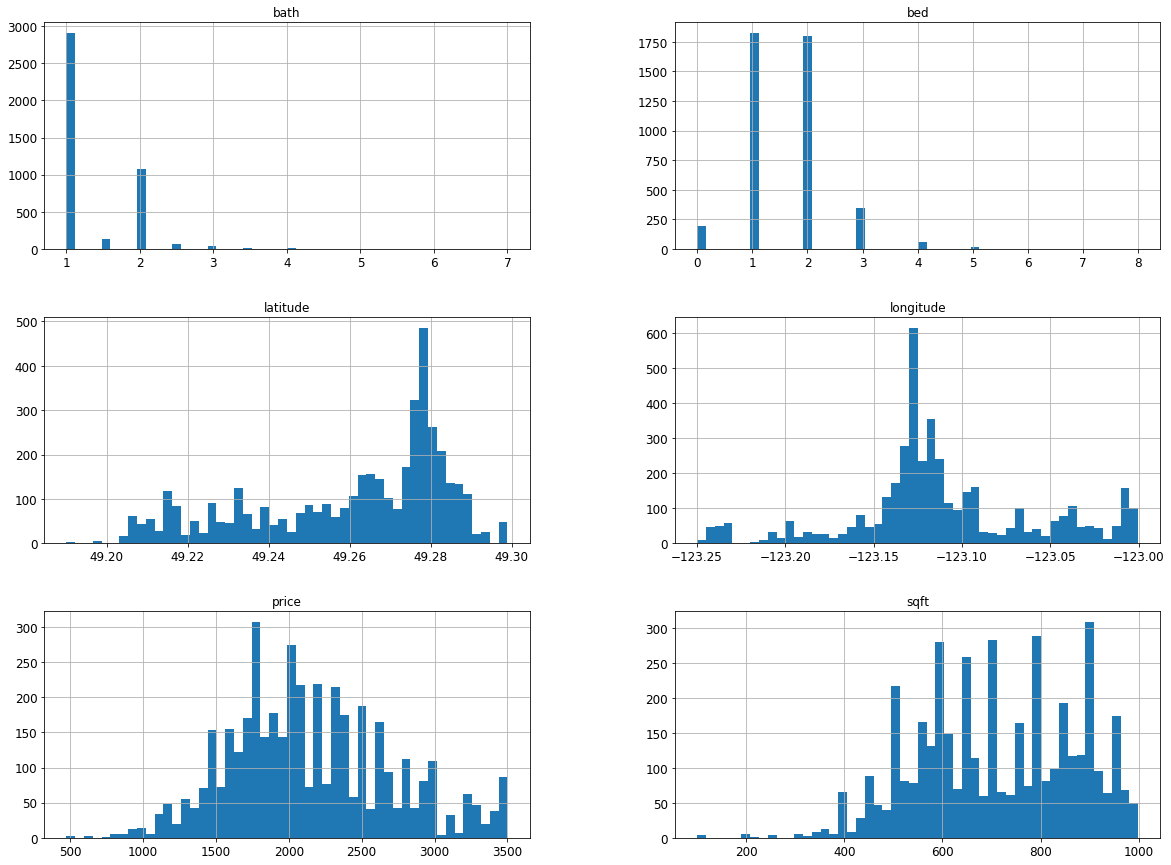

In [14]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

As we can see the mean price of living in Vancouver is roughly 2000. With the average square footage around 600. Now that we have a visual understanding of the information let's look at the actual numbers.

###### Show statistical information

In [15]:
housing.describe()

,latitude,longitude,bed,bath,sqft,price
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,49.260590,-123.111297,1.601367,1.323904,711.152051,2152.998350
std,0.024192,0.052579,0.800099,0.521854,159.950662,555.036837
min,49.190048,-123.249865,0.000000,1.000000,100.000000,475.000000
25%,49.243082,-123.132971,1.000000,1.000000,600.000000,1750.000000
50%,49.268118,-123.119481,2.000000,1.000000,700.000000,2100.000000
75%,49.278800,-123.090800,2.000000,2.000000,850.000000,2500.000000
max,49.299000,-123.000313,8.000000,7.000000,999.000000,3500.000000


This information just further confirms what we were just able to see.

##### Create a test and train set

before we move forward I am going to split the data into a train and test dataset.Using a random state of 42 to ensure we split the data the same way each time.

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

##### Limit or stop sample bias ####

since we have a small data set, we might run into a sample bias. To combat this as best as possible, cut the data into a price catagory. 

In [17]:
housing["price_cat"] = pd.cut(housing["price"],
                              bins =[0.0,500.0,1000.0,1500.0,2000.0,2500.0,3000.0,3500.0,np.inf],
                              labels=[1,2,3,4,5,6,7,8])

In [18]:
housing["price_cat"].value_counts()

4    1556
5    1231
6     687
3     427
7     298
2      41
1       2
8       0
Name: price_cat, dtype: int64

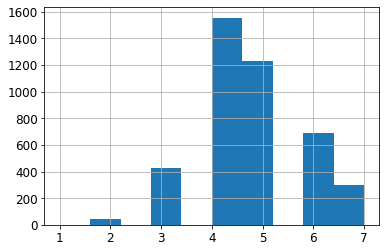

In [19]:
housing["price_cat"].hist()

##### Stratified sampling to hopefully have no bias 

In [20]:
housing.reset_index(drop=True,inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit

#NOtE: this data needs to have the index reset! else it will give an error.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing["price_cat"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [21]:
start_test_set["price_cat"].value_counts()

4    311
5    246
6    138
3     86
7     60
2      8
8      0
1      0
Name: price_cat, dtype: int64

In [22]:
start_test_set["price_cat"].value_counts() / len(start_test_set)

4    0.366313
5    0.289753
6    0.162544
3    0.101296
7    0.070671
2    0.009423
8    0.000000
1    0.000000
Name: price_cat, dtype: float64

It seems like the stratification is working, we have a well distributed test and train set.

##### Remove price catagory 
We know the data is well distributed, therefore we can remoce the price catagory.

In [23]:
for set_ in (start_train_set, start_test_set):
    set_.drop("price_cat",axis=1, inplace=True)

### Visulize Data

##### Develop plot with latitude and longitude 

In [24]:
housing = start_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3393 entries, 1276 to 3849
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   3393 non-null   float64
 1   longitude  3393 non-null   float64
 2   bed        3393 non-null   int64  
 3   bath       3393 non-null   float64
 4   sqft       3393 non-null   int64  
 5   price      3393 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 185.6 KB


Saving figure housing_prices_scatterplot


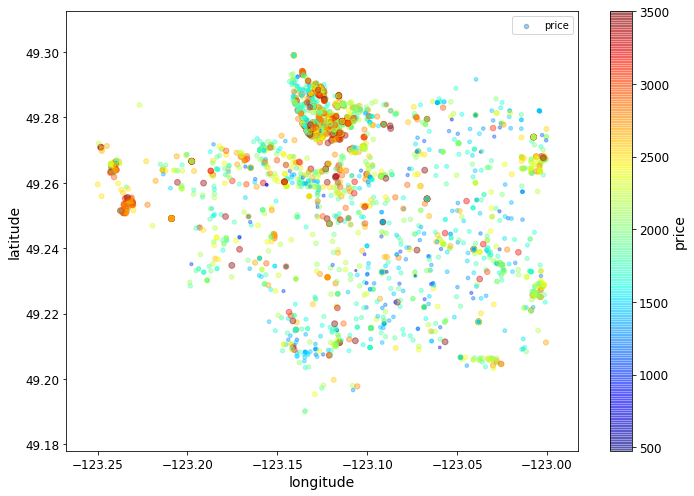

In [25]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4, 
             s=housing['price']/100,label = "price",figsize=(10,7),
            c="price",cmap=plt.get_cmap("jet"),colorbar=True,
            sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

So this is pretty interesting UBC is a univerity and it has super high rates for rent, which is total bs. No wonder being a student here is extremly expensive.

There are a couple area's that we can see are expeinsive. along false creek (lat 49.26) downtown yaletown (lat 49.27) it also looks like metrotown (lat 49.22) and burnaby downtown (lat 49.26) are expensive

Saving figure vancouver_housing_prices_plot


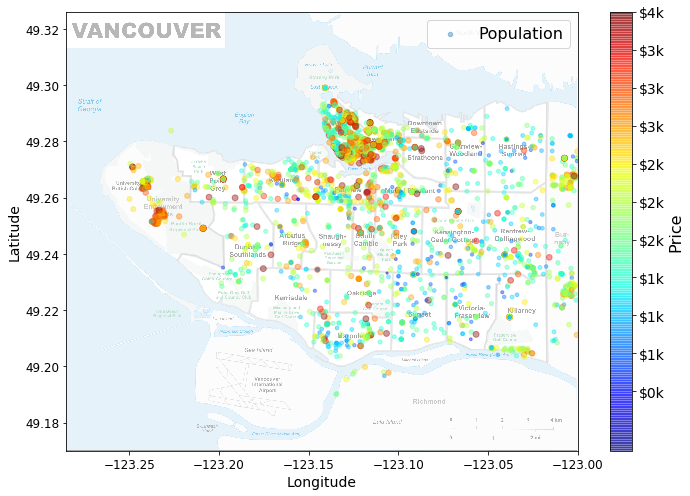

In [26]:
import matplotlib.image as mpimg
vancouver_img=mpimg.imread("images/end_to_end_project/Stadtgliederung_Vancouver_2008.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['price']/100, label="Population",
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(vancouver_img, extent=[-123.285, -123.00, 49.17, 49.326], aspect = 'auto', alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Price', fontsize=16)

plt.legend(fontsize=16)
save_fig("vancouver_housing_prices_plot")
plt.show()

### Statistics

##### Corrolation

In [27]:
corr_matrix = housing.corr()
corr_matrix

,latitude,longitude,bed,bath,sqft,price
latitude,1.000000,-0.256626,-0.081897,-0.004688,0.099609,0.223844
longitude,-0.256626,1.000000,-0.026282,-0.021597,-0.085642,-0.208496
bed,-0.081897,-0.026282,1.000000,0.598256,0.182497,0.440753
bath,-0.004688,-0.021597,0.598256,1.000000,0.220246,0.549048
sqft,0.099609,-0.085642,0.182497,0.220246,1.000000,0.378023
price,0.223844,-0.208496,0.440753,0.549048,0.378023,1.000000


##### visualization is always better

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251FEB8A188>,
      dtype=object)

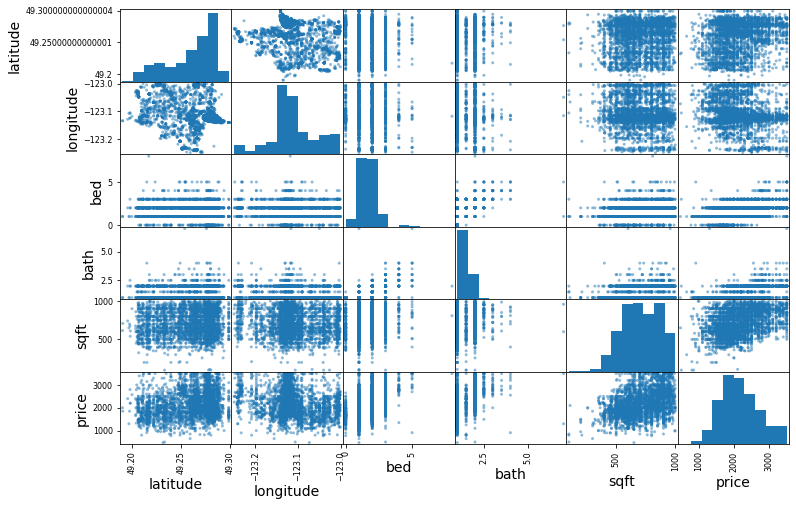

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing,figsize=(12,8))

Went back and took a lot more data and now we can see come corr happening, they are not very strong however this they are corrolations we expect. such as increase in sqft increase in price.

Saving figure corrolation_plot


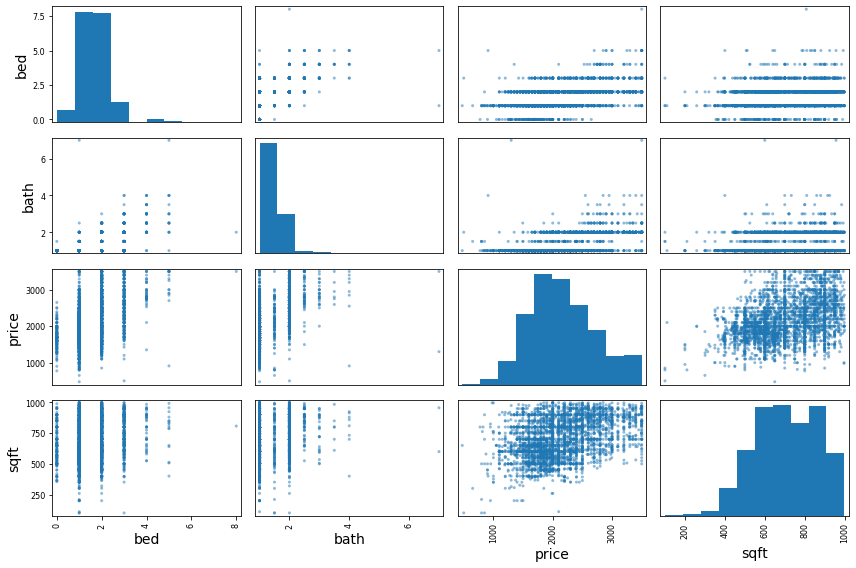

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["bed","bath","price","sqft"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("corrolation_plot")

##### searching for more corrolations

In [30]:
housing["price_per_sqft"] = housing["price"]/housing["sqft"]
housing["price_per_bed"] = housing["price"]/housing["bed"]
housing["price_per_bath"] = housing["price"]/housing["bath"]


In [31]:
corr_matrix = housing.corr()
corr_matrix["price"].sort_values(ascending=False)

price             1.000000
bath              0.549048
price_per_sqft    0.517162
bed               0.440753
sqft              0.378023
price_per_bath    0.264027
latitude          0.223844
price_per_bed     0.215732
longitude        -0.208496
Name: price, dtype: float64

### Prepare the data for maching learning

##### Drop labels 

In [32]:
housing_attr = start_train_set.drop("price",axis=1)
housing_labels = start_train_set["price"].copy()
housing_attr.head()

,latitude,longitude,bed,bath,sqft
1276,49.299000,-123.140800,2,1.0,500
2348,49.282289,-123.099630,2,2.0,810
3204,49.225964,-123.120136,3,1.0,393
1708,49.262547,-123.129197,2,1.0,460
1942,49.215100,-123.139600,2,1.0,910


##### Data cleaning, ensure no missing data

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_attr)
X=imputer.transform(housing_attr)
housing_tr = pd.DataFrame(X, columns=housing_attr.columns, index=housing_attr.index)

In [34]:
housing_tr.head()

,latitude,longitude,bed,bath,sqft
1276,49.299000,-123.140800,2.0,1.0,500.0
2348,49.282289,-123.099630,2.0,2.0,810.0
3204,49.225964,-123.120136,3.0,1.0,393.0
1708,49.262547,-123.129197,2.0,1.0,460.0
1942,49.215100,-123.139600,2.0,1.0,910.0


##### Custom transform for adding additional attributes 
good practice for future expandibility

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

bed_ix, bath_ix, sqft_ix = 2,3,4

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self # nothing else to do
    def transform(self,X):
        beds_per_sqft = X[:,bed_ix] / X[:, sqft_ix]
        bath_per_sqft = X[:,bath_ix] / X[:,sqft_ix]
        bed_per_bath = X[:,bed_ix] / X[:,bath_ix]
        return np.c_[X,beds_per_sqft, bath_per_sqft,bed_per_bath]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_attr.values)

In [36]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_attr.columns)+["beds_per_sqft","bath_per_sqft","bed_per_bath"],
    index=housing_attr.index)
housing_extra_attribs.head()

,latitude,longitude,bed,bath,sqft,beds_per_sqft,bath_per_sqft,bed_per_bath
1276,49.299000,-123.140800,2.0,1.0,500.0,0.004000,0.002000,2.0
2348,49.282289,-123.099630,2.0,2.0,810.0,0.002469,0.002469,1.0
3204,49.225964,-123.120136,3.0,1.0,393.0,0.007634,0.002545,3.0
1708,49.262547,-123.129197,2.0,1.0,460.0,0.004348,0.002174,2.0
1942,49.215100,-123.139600,2.0,1.0,910.0,0.002198,0.001099,2.0


##### Transformation pipelines 
Ensure no nan. apply custum transform. Standardize data

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs = list(housing_attr)
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('str_scaler', StandardScaler())])

housing_prepared = num_pipeline.fit_transform(housing_attr)

In [38]:
housing_prepared

array([[ 1.59075109, -0.5617056 ,  0.51453328, ...,  1.2374876 ,
         0.04431968,  1.34774299],
       [ 0.89878952,  0.22196583,  0.51453328, ...,  0.09526493,
         0.54450815, -0.40687592],
       [-1.43349076, -0.16836611,  1.77686982, ...,  3.94861401,
         0.624892  ,  3.1023619 ],
       ...,
       [-0.37304339, -2.38409858,  1.77686982, ...,  0.95633742,
         1.13111363, -0.05595213],
       [ 0.97485519, -0.0422782 ,  0.51453328, ..., -0.1337771 ,
         0.21721556, -0.40687592],
       [ 0.81655412, -0.11270774,  3.03920636, ...,  1.64446724,
         2.75826096, -0.40687592]])

### Select and train model

##### Linear regression

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
some_data = housing_attr.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print("prediction:", lin_reg.predict(some_data_prepared))

prediction: [2075.93041653 2632.19383515 1679.47995902 1867.10840675 2030.26972395]


In [41]:
print("Labels:", list(some_labels))

Labels: [1800, 2475, 2200, 1950, 2016]


##### root mean squared error #####

In [42]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

408.60737563531154

So we have an error of around $408 which is a fair amount when it comes to rent.

##### Decision TreeRegression ####

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

54.98685168368133

This is good, we are not over fitting the error because we are still getting an error in our prediction. but we should use cross valodation to further understand the data.

##### Cross Validation

the above error was rather nice. However, it is a good idea to do cross validation.

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [47]:
display_scores(tree_rmse_scores)

scores: [512.80824606 542.55820777 505.24140448 528.54782551 548.61269733
 478.87475429 488.23366064 575.57288955 546.83802012 525.56320788]
mean: 525.2850913619495
Standard Deviation: 28.161677642268344


Ok, so the tree is preforming worse than the linear model. The error is around $526+-25 for each trial.

In [48]:
lin_score = cross_val_score(lin_reg,housing_prepared,housing_labels,
                           scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_score)
display_scores(lin_rmse_scores)

scores: [410.61430046 418.65254568 398.50645662 407.70444823 409.82160544
 388.27329812 395.10289267 417.38286279 407.82948437 451.97830658]
mean: 410.5866200938518
Standard Deviation: 16.506286707439628


Yes the linear model is preforming better, and their errors are not over laping, so we can say with confidence the linear model is better here.

##### RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

155.38311666982236

In [50]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores: [374.32607906 423.49283597 370.53728207 396.45005761 388.00510278
 350.91982412 393.476211   425.05035629 405.24849322 402.31877782]
mean: 392.9825019948769
Standard Deviation: 22.034085920481346


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 20, 30, 40, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

453.92284092460176 {'max_features': 2, 'n_estimators': 3}
406.719124091054 {'max_features': 2, 'n_estimators': 10}
400.25105448702544 {'max_features': 2, 'n_estimators': 20}
395.18228527250426 {'max_features': 2, 'n_estimators': 30}
397.2323690784511 {'max_features': 2, 'n_estimators': 40}
394.60290516441637 {'max_features': 2, 'n_estimators': 50}
441.432390777366 {'max_features': 4, 'n_estimators': 3}
405.982494677777 {'max_features': 4, 'n_estimators': 10}
399.077588405608 {'max_features': 4, 'n_estimators': 20}
395.57421366418913 {'max_features': 4, 'n_estimators': 30}
393.9101383566323 {'max_features': 4, 'n_estimators': 40}
392.37446055180556 {'max_features': 4, 'n_estimators': 50}
444.93026087957793 {'max_features': 6, 'n_estimators': 3}
408.393730096053 {'max_features': 6, 'n_estimators': 10}
397.6742206435291 {'max_features': 6, 'n_estimators': 20}
396.5693309206915 {'max_features': 6, 'n_estimators': 30}
393.6475730942933 {'max_features': 6, 'n_estimators': 40}
395.38044662114

In [55]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.17201327, 0.19772897, 0.01932748, 0.33524915, 0.11569973,
       0.0859525 , 0.06322721, 0.01080168])

In [56]:
extra_attribs = ["beds_per_sqft","bath_per_sqft","bed_per_bath"]
attributes = num_attribs + extra_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.3352491519911819, 'bath'),
 (0.19772897291432273, 'longitude'),
 (0.17201327451677698, 'latitude'),
 (0.11569972697199722, 'sqft'),
 (0.08595250065912537, 'beds_per_sqft'),
 (0.06322720648433384, 'bath_per_sqft'),
 (0.01932748383268635, 'bed'),
 (0.010801682629575704, 'bed_per_bath')]

In [57]:
final_model = grid_search.best_estimator_

X_test = start_test_set.drop("price", axis=1)
y_test = start_test_set["price"].copy()
X_test.head()
X_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)

final_rmse = np.sqrt(final_mse)

In [58]:
final_mse

156623.17798031413

In [59]:
final_rmse

395.7564629672068

In [60]:
len(final_predictions)

849

Saving figure sqrt_vs_price


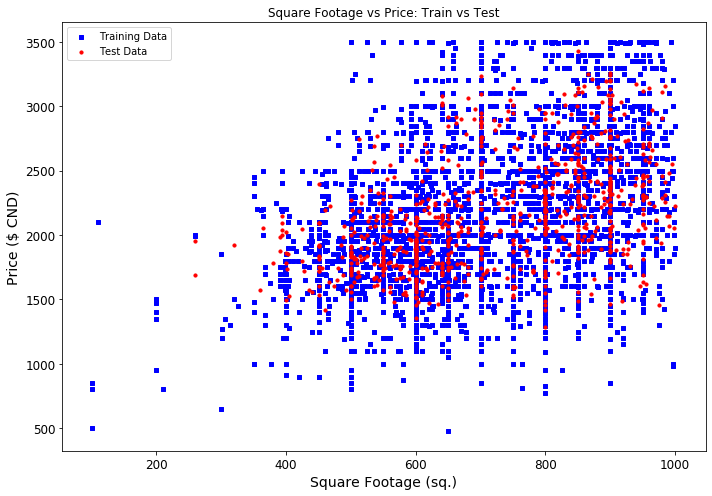

In [61]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.scatter(start_train_set["sqft"], start_train_set["price"], s=10, c='b', marker="s", label='Training Data')
ax1.scatter(start_test_set["sqft"],final_predictions, s=10, c='r', marker="o", label='Test Data')
plt.legend(loc='upper left')
plt.title("Square Footage vs Price: Train vs Test")
plt.xlabel("Square Footage (sq.)")
plt.ylabel("Price ($ CND)")
save_fig("sqrt_vs_price")
plt.show()

Saving figure beds_vs_price


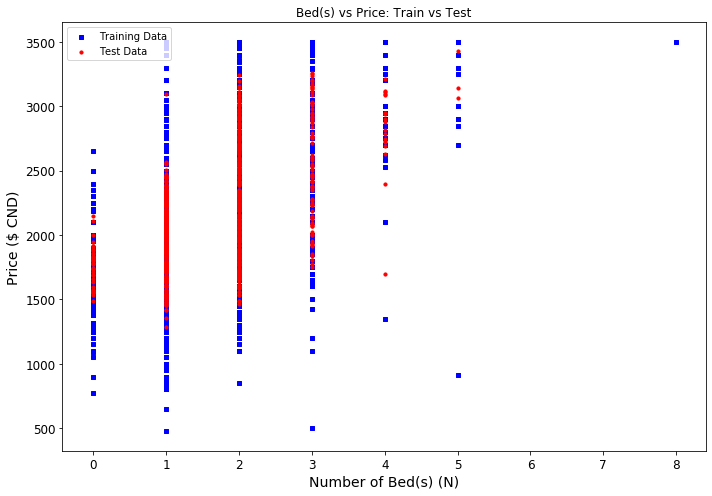

In [62]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.scatter(start_train_set["bed"], start_train_set["price"], s=10, c='b', marker="s", label='Training Data')
ax1.scatter(start_test_set["bed"],final_predictions, s=10, c='r', marker="o", label='Test Data')
plt.legend(loc='upper left')
plt.title("Bed(s) vs Price: Train vs Test")
plt.xlabel("Number of Bed(s) (N)")
plt.ylabel("Price ($ CND)")
save_fig("beds_vs_price")
plt.show()


Saving figure Bath_vs_price


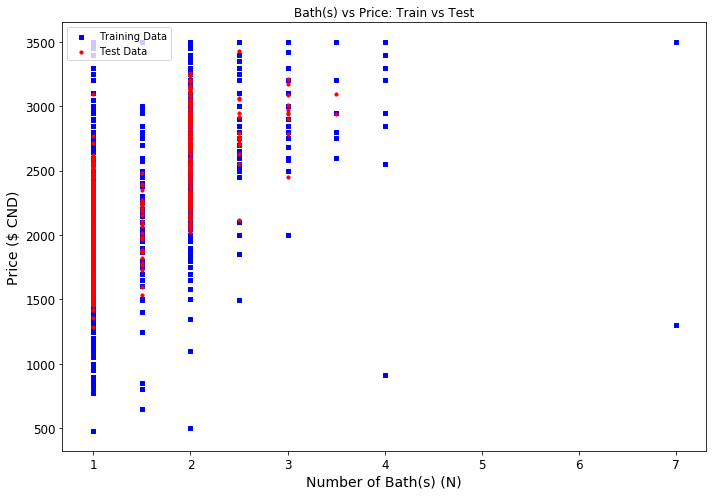

In [63]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
ax1.scatter(start_train_set["bath"], start_train_set["price"], s=10, c='b', marker="s", label='Training Data')
ax1.scatter(start_test_set["bath"],final_predictions, s=10, c='r', marker="o", label='Test Data')
plt.legend(loc='upper left')
plt.title("Bath(s) vs Price: Train vs Test")
plt.xlabel("Number of Bath(s) (N)")
plt.ylabel("Price ($ CND)")
save_fig("Bath_vs_price")
plt.show()


In [64]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([371.28995769, 418.79604019])